In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
Datam = pd.read_csv("/content/Magic.csv")
Datal = pd.read_csv("/content/letter-recognition.csv")
Datal=Datal.rename({'letter': 'class'}, axis=1)

In [3]:
Datal

,class,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
Datam = Datam.sample(frac=1,random_state=42).reset_index(drop=True)
Datam=Datam.drop(['Unnamed: 0'],axis = 1)
Datam

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240,h
1,23.4858,0.0000,2.2393,0.7378,0.3775,-2.9397,13.0915,0.0001,19.3410,235.3420,g
2,40.5429,19.4073,3.3382,0.2369,0.1269,29.1908,27.0567,-7.1243,10.0643,195.6030,g
3,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655,h
4,205.4250,37.7936,3.2727,0.2167,0.1257,46.0952,-210.9350,-29.7478,60.0580,206.1730,h
...,...,...,...,...,...,...,...,...,...,...,...
19015,31.9212,16.7667,2.6566,0.3837,0.2348,3.7913,21.0170,3.4354,3.0450,249.3750,g
19016,43.4538,17.6541,2.9965,0.2621,0.1426,-12.4850,-23.2863,-11.3567,6.2607,184.7290,g
19017,19.9926,12.0866,2.4354,0.5725,0.3982,16.1410,16.3239,9.4374,12.7719,193.8930,g
19018,31.4336,23.2651,2.9340,0.2957,0.1717,-9.1278,19.8518,19.2893,79.9590,23.2363,g


In [5]:
Datal=Datal.replace(['A','B','C','D','E','F','G','H','I','J','K','L','M'],1)

In [6]:
Datal=Datal.replace(['N','O','P','Q','R','S','T','U','V','W','X','Y','Z'],-1)
Datal

,class,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,1,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,-1,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,1,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,1,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,-1,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,-1,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [7]:
m=len(Datam['class'])
count0=0
for i in range(m):
  if ord(Datam['class'][i])==ord('g'):
    Datam['class'][i]=1
    count0+=1
  else:
    if ord(Datam['class'][i])==ord('h'):
     Datam['class'][i]=-1  
print(count0)
Datam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


12332


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240,-1
1,23.4858,0.0000,2.2393,0.7378,0.3775,-2.9397,13.0915,0.0001,19.3410,235.3420,1
2,40.5429,19.4073,3.3382,0.2369,0.1269,29.1908,27.0567,-7.1243,10.0643,195.6030,1
3,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655,-1
4,205.4250,37.7936,3.2727,0.2167,0.1257,46.0952,-210.9350,-29.7478,60.0580,206.1730,-1
...,...,...,...,...,...,...,...,...,...,...,...
19015,31.9212,16.7667,2.6566,0.3837,0.2348,3.7913,21.0170,3.4354,3.0450,249.3750,1
19016,43.4538,17.6541,2.9965,0.2621,0.1426,-12.4850,-23.2863,-11.3567,6.2607,184.7290,1
19017,19.9926,12.0866,2.4354,0.5725,0.3982,16.1410,16.3239,9.4374,12.7719,193.8930,1
19018,31.4336,23.2651,2.9340,0.2957,0.1717,-9.1278,19.8518,19.2893,79.9590,23.2363,1


In [8]:
Data_trainm=Datam.sample(frac=0.666667)
Data_trainl=Datal.sample(frac=0.666667)
Data_testm = Datam.drop(Data_trainm.index)
Data_testl= Datal.drop(Data_trainl.index)
print(Data_trainm.shape)
Data_trainm

(12680, 11)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
13377,95.8777,34.7056,3.8521,0.1568,0.0846,-43.0463,43.0990,-12.5475,1.3970,336.6470,1
18821,239.6470,64.2808,3.3077,0.1728,0.0968,-235.0690,-216.5840,50.7395,13.6150,252.9830,-1
16545,12.6054,11.8205,2.1746,0.6957,0.3779,-16.0961,9.8325,-7.7148,6.0163,139.7230,1
7510,19.6894,9.5720,2.7192,0.5990,0.3105,-6.0830,17.5670,-9.9337,32.7719,186.1666,-1
6711,40.2282,14.2514,2.8136,0.3487,0.1774,-27.9393,-19.3772,-12.7450,2.9690,181.5850,1
...,...,...,...,...,...,...,...,...,...,...,...
18510,103.7040,45.9780,3.9340,0.1194,0.0721,-87.6120,57.1757,27.5074,3.8090,270.6560,1
17111,126.5824,16.6220,2.7515,0.3174,0.1376,-61.3430,-93.5158,8.5712,88.0237,201.1536,-1
9212,37.1295,20.6574,2.9335,0.2238,0.1148,3.8400,-19.9706,-6.2125,1.9200,200.6220,1
5063,23.2673,10.2974,2.4354,0.5908,0.3725,9.0750,17.7489,8.6035,74.2971,222.4300,-1


In [9]:
print(Data_trainl.shape)
Data_trainl

(13333, 17)


,class,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
6421,1,6,9,5,4,3,9,5,5,6,12,3,8,5,7,5,10
9397,1,5,6,7,4,5,10,6,2,4,9,4,7,7,6,2,8
5106,-1,6,11,9,8,7,9,8,2,5,13,5,5,3,9,4,9
1155,1,2,6,3,4,1,13,2,8,4,14,4,12,0,7,0,8
9008,-1,5,8,7,10,6,11,4,3,5,9,2,7,2,7,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,-1,3,6,4,4,1,5,11,2,2,8,12,8,1,11,0,8
7403,-1,3,7,5,5,3,10,7,3,6,10,3,7,3,7,3,10
6904,1,2,6,4,4,5,9,8,4,4,7,6,6,3,8,7,4
17877,-1,3,7,4,5,2,7,7,3,12,8,6,8,0,8,7,7


In [11]:
def svm_random(Data_train,Data_test):
  pp=0;
  linear_model = SVC(kernel='linear')
  accs=[]
  while pp<20:
    Data_random=Data_train.sample(n=500)
    X_train = Data_random.drop(['class'],axis = 1)
    y_train = Data_random['class']
    y_train=y_train.astype('int')
    X_test = Data_test.drop(['class'],axis = 1)
    y_test =  Data_test['class']
    y_test=y_test.astype('int')
    linear_model.fit(X_train,y_train)
    y_pred = linear_model.predict(X_test)
    pp+=1
    acc=metrics.accuracy_score(y_true = y_test,y_pred = y_pred)
    accs.append(1-acc)
  plt.title("misclassification graph for random")  
  plt.xlabel("X axis")  
  plt.ylabel("Y axis")  
  plt.plot(np.arange(1,21), accs, color ="red")  
  plt.show()
  return 100*np.mean(accs),100*np.std(accs)

In [12]:
def loss(f,z):
  if f*z>1:
    return 0
  else:
    return (1-f*z)

In [13]:
import math

def markovsampling(df):
  linear_model = SVC(kernel='linear')
  
  
  T=5
  N=len(df)
  rsample = df[0:0]
  t=0
  while t<T:
    sample = df[0:0]
    dtr=df.copy()
    X_train = dtr.drop(['class'],axis = 1)
    y_train = dtr['class']
    y_train=y_train.astype('int')
    linear_model.fit(X_train,y_train)
    kvalmax=5
    kval=0
    m0=0
    m1=0
    zt=dtr.sample(n=1)
    ztl=zt.to_numpy()
    id=len(sample)
    sample = sample.append(pd.DataFrame(ztl,index=[id+1],columns=sample.columns))
    dtr=dtr.drop(zt.index)
    yl=zt['class'].to_numpy()
    yt=yl[0]
    if yt==-1:
      m0+=1
    else:
      m1+=1
    ydt=linear_model.predict(zt.drop(['class'],axis = 1))
    
    i=0
    while i<N and len(dtr)>0:
      id=len(sample)
      zst=dtr.sample(n=1)
      zstl=zst.to_numpy()
      dtr=dtr.drop(zst.index)
      ysl=zst['class'].to_numpy()
      yst=ysl[0]
      ydst=linear_model.predict(zst.drop(['class'],axis = 1))
      pr=math.exp(-loss(ydst,ydst))/math.exp(-loss(ydt,yt))
      if pr==1 and yt==-1 and yst==-1:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      elif pr==1 and yt==1 and yst==1:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      elif (pr==1 and yt*yst==-1) or pr<0:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      elif pr>1:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
      elif kval==kvalmax:
        sample = sample.append(pd.DataFrame(zstl,index=[id+1],columns=sample.columns))
        kval=0
      else:
        kval+=1
      zt=zst
      if yst==-1:
       m0+=1
      else:
       m1+=1
    i=i+1
    # print(len(sample))
    X_train = sample.drop(['class'],axis = 1)
    y_train = sample['class']
    y_train=y_train.astype('int')
    linear_model.fit(X_train,y_train)
    rsample=sample
    t=t+1
  return rsample
    


In [14]:
def svm_markov(Data_train,Data_test):
  pp=0;
  linear_model = SVC(kernel='linear')
  accs=[]
  while pp<20:
    dtr=Data_train.sample(n=500)
    dtr.reset_index(drop=True, inplace=True)  
    Data_markov=markovsampling(dtr)
    X_train = Data_markov.drop(['class'],axis = 1)
    y_train = Data_markov['class']
    y_train=y_train.astype('int')
    X_test = Data_test.drop(['class'],axis = 1)
    y_test =  Data_test['class']
    y_test=y_test.astype('int')
    linear_model.fit(X_train,y_train)
    y_pred = linear_model.predict(X_test)
    acc=metrics.accuracy_score(y_true = y_test,y_pred = y_pred)
    accs.append(1-acc)
    pp+=1
  plt.title("misclassification graph for markov")  
  plt.xlabel("X axis")  
  plt.ylabel("Y axis")  
  plt.plot(np.arange(1,21), accs, color ="red")  
  plt.show()
  
  return 100*np.mean(accs),100*np.std(accs)

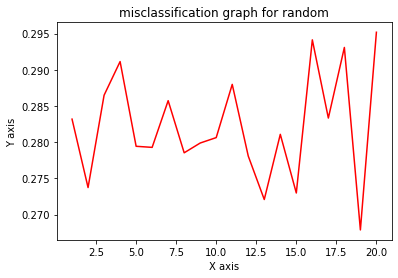

mean misclassification rate for random sample with std for letter (28.219589020548973, 0.740002863647952)


In [15]:
print("mean misclassification rate for random sample with std for letter",svm_random(Data_trainl,Data_testl))

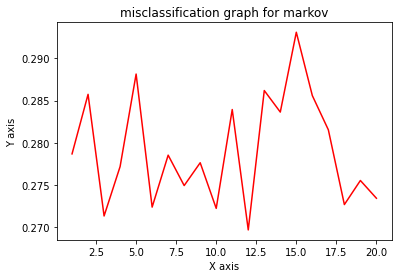

mean misclassification rate for boosted with markov sample with std for letter (27.910604469776505, 0.6379814236737256)


In [16]:
print("mean misclassification rate for boosted with markov sample with std for letter",svm_markov(Data_trainl,Data_testl))

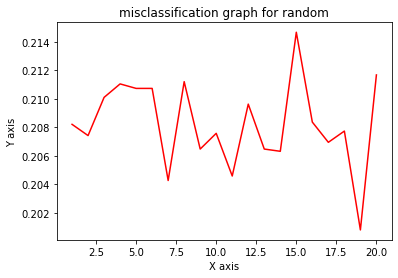

mean misclassification rate for random sample with std for magic (20.824132492113563, 0.3044153822247947)


In [17]:
print("mean misclassification rate for random sample with std for magic",svm_random(Data_trainm,Data_testm))

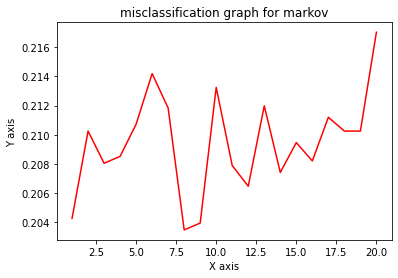

mean misclassification rate for markov sample with std for magic (20.94321766561514, 0.3362471207354323)


In [18]:
print("mean misclassification rate for markov sample with std for magic",svm_markov(Data_trainm,Data_testm))